In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
import csv

In [16]:
# with open('lowpass.csv', 'r') as file:
#     reader = csv.reader(file)
#     freqs = []
#     gains = []
#     for row in reader:
#         freq, gain = row[0].split('\t')
#         freqs.append(float(freq))
#         gains.append(float(gain))

def get_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        freqs = []
        gains = []
        for row in reader:
            freq, gain = row[0].split('\t')
            freqs.append(float(freq))
            gains.append(float(gain)**2)
    return freqs, gains

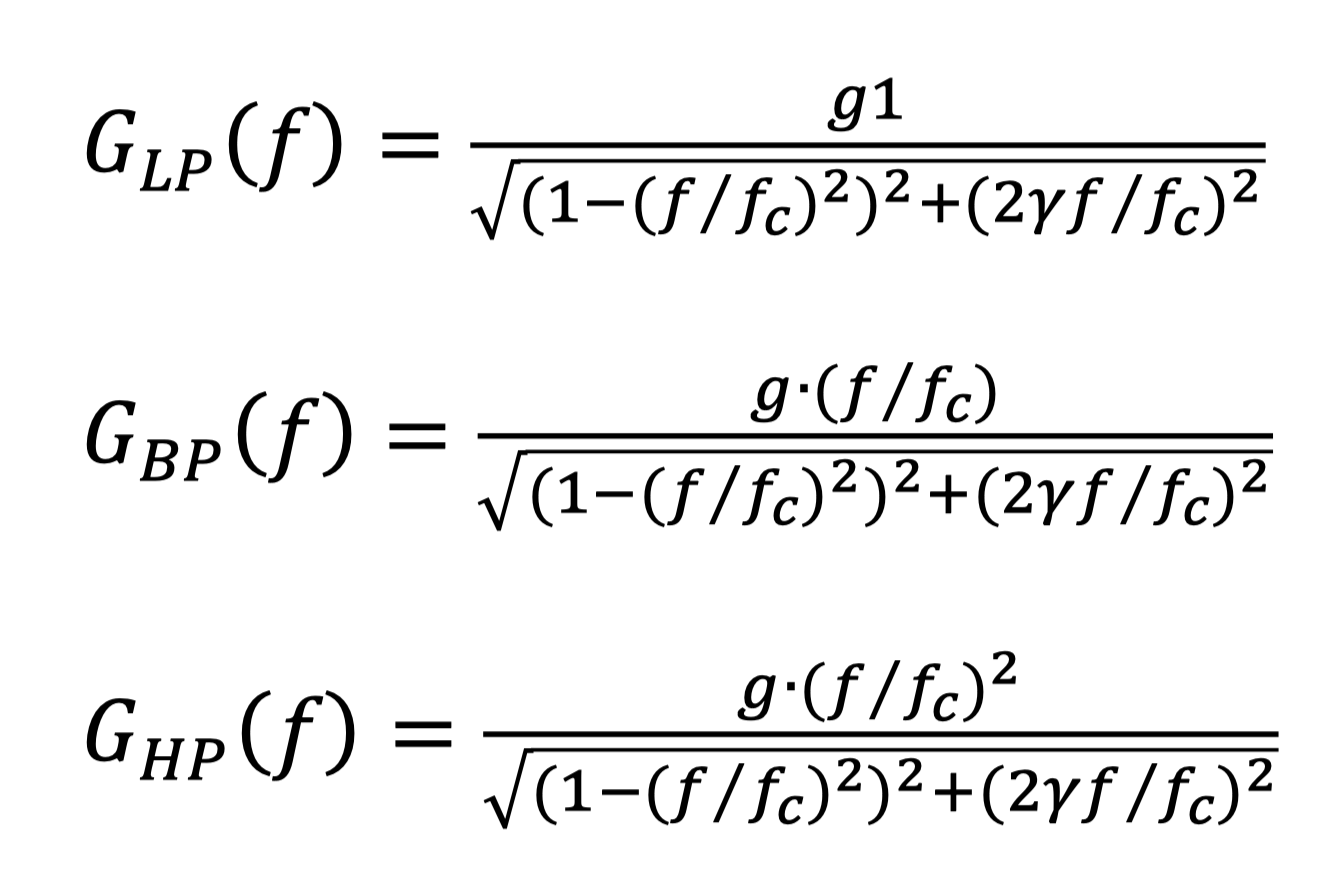

In [17]:
def Gsq_lp(f, fc):
    return 1/(1+(f/fc)**4)

def Gsq_lp2(f, fc, g, gamma):
    return g**2/((1-(f/fc)**2)**2 + (2*gamma*f/fc)**2)

array([103.33547505,   0.99877652,  -0.70492506])

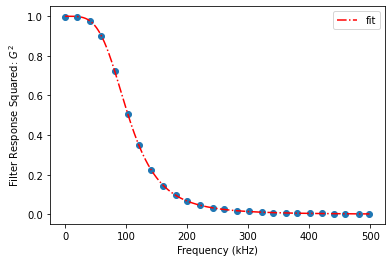

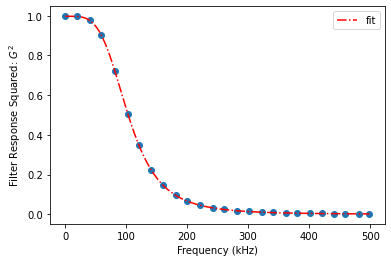

In [18]:
def get_graph(csv_filename, function):
    fig, ax = plt.subplots(1,1)
    ax.set_ylabel('Filter Response Squared: $G^2$')
    ax.set_xlabel('Frequency (kHz)')

    freqs, gains = get_data(csv_filename)
    ax.scatter(freqs, gains)

    popt, pcov = curve_fit(function, freqs, gains)
    fc = popt[0]
    u_popt = np.sqrt(np.diag(pcov))

    freqs_fit = np.linspace(freqs[0],freqs[-1], 1000)
    gains_fit = function(freqs_fit, *popt)
    ax.plot(freqs_fit, gains_fit, color = 'r', linestyle='-.',label='fit')
    ax.legend()
    return popt

get_graph('lowpass.csv', Gsq_lp)
get_graph('lowpass.csv', Gsq_lp2)

array([91.26261072])

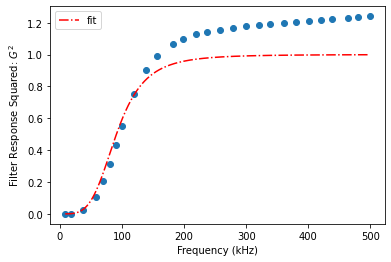

In [19]:
def Gsq_hp(f, fc):
    return (f/fc)**4/(1+(f/fc)**4)

def Gsq_hp2(f, fc, g, gamma):
    return g**2*(f/fc)**4/((1-(f/fc)**2)**2 + (2*gamma*f/fc)**2)

get_graph('highpass.csv', Gsq_hp)

array([-103.60325842,    1.05315998,    0.71528005])

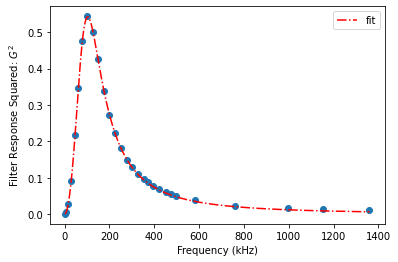

In [21]:
def Gsq_bp(f, fc):
    return (f/fc)**2/(1+(f/fc)**4)

def Gsq_bp2(f, fc, g, gamma):
    return g**2*(f/fc)**2/((1-(f/fc)**2)**2 + (2*gamma*f/fc)**2)

get_graph('bandpass.csv', Gsq_bp2)